### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Dataset

In [2]:
df = pd.read_csv(r'C:\Users\ashra\Desktop\Lighthouse Bootcamp\W11-FinalProject\cargurus_eda_major_option.csv')

In [3]:
df

,brand,mileage,car-type,age,transmission,color,drivetrain,fuel type,engine-hp,engine-l,engine-type,location,no_of_features,major options,price
0,RAM,26000,RAM 1500 Classic Tradesman Crew Cab 4WD,3,Automatic,Blue,Four-Wheel Drive,Flex Fuel Vehicle,305.000000,3.6,V6,New Westminster,7.0,"Alloy Wheels, Bluetooth, Backup Camera, Remote...",38900
1,Lexus,49000,Lexus NX 200t AWD,7,Automatic,Silver,All-Wheel Drive,Gasoline,235.000000,2.0,I4,Port Coquitlam,5.0,"Sport Package, Bluetooth, Backup Camera, Heate...",28900
2,Toyota,216288,Toyota Tacoma Prerunner V6 Crew Cab SB,19,Automatic,Red,Rear-Wheel Drive,Gasoline,190.000000,3.4,V6,Burnaby,1.0,Alloy Wheels,11980
3,Mercedes-Benz,155000,Mercedes-Benz Sprinter Cargo 2500 144 V6 Stand...,4,Automatic,Other,Front-Wheel Drive,Diesel,188.000000,3.0,V6,Vancouver,2.0,"Bluetooth, Backup Camera",38995
4,BMW,32575,BMW X5 sDrive35i RWD,4,Automatic,Gray,Rear-Wheel Drive,Gasoline,300.000000,3.0,I6,Chilliwack,7.0,"Leather Seats, Sunroof/Moonroof, Navigation Sy...",42485
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1878,Kia,63250,Kia Sedona,2,Automatic,Gray,All-Wheel Drive,Gasoline,276.000000,3.3,V6,Surrey,-1.0,NaN,35900
1879,Ford,159564,Ford F-150 SVT Raptor SuperCrew 4WD,5,Automatic,White,Four-Wheel Drive,Gasoline,272.657778,3.5,V6,Duncan,6.0,"Sunroof/Moonroof, Parking Sensors, Navigation ...",62900
1880,GMC,89259,GMC Sierra 1500 SLE Double Cab 4WD,4,Automatic,Black,Four-Wheel Drive,Gasoline,355.000000,5.3,V8,Surrey,2.0,"Parking Sensors, Convenience Package",39888
1881,Jeep,69136,Jeep Wrangler Rubicon 4WD,4,Automatic,Other,Four-Wheel Drive,Gasoline,285.000000,3.6,V6,Langley,-1.0,NaN,47900


Taking a look at the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   brand           1883 non-null   object 
 1   mileage         1883 non-null   int64  
 2   car-type        1883 non-null   object 
 3   age             1883 non-null   int64  
 4   transmission    1883 non-null   object 
 5   color           1883 non-null   object 
 6   drivetrain      1883 non-null   object 
 7   fuel type       1883 non-null   object 
 8   engine-hp       1883 non-null   float64
 9   engine-l        1883 non-null   float64
 10  engine-type     1883 non-null   object 
 11  location        1883 non-null   object 
 12  no_of_features  1883 non-null   float64
 13  major options   1581 non-null   object 
 14  price           1883 non-null   int64  
dtypes: float64(3), int64(3), object(9)
memory usage: 220.8+ KB


In [5]:
df.describe()

,mileage,age,engine-hp,engine-l,no_of_features,price
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,67509.322358,4.782262,269.563099,3.186965,4.936272,36654.314392
std,58549.196831,3.506842,90.177891,1.377264,4.288132,19646.068334
min,338.000000,0.000000,70.000000,0.900000,-1.000000,2990.000000
25%,23433.000000,2.000000,190.000000,2.000000,2.000000,21999.500000
50%,51762.000000,4.000000,272.657778,3.000000,5.000000,33901.000000
75%,94711.500000,6.000000,305.000000,3.600000,8.000000,47999.000000
max,400000.000000,22.000000,707.000000,6.700000,25.000000,99999.000000


#### Graphical Analysis

In [6]:
def histogram_plot(df, column, x_end, bins):
    plt.style.use("bmh")
    
    fig, ax = plt.subplots(figsize = (8,6))

    # Plots #
    # Plot histogram
    ax.grid(False)
    df[column].plot(kind = "hist", density = True, alpha = 0.65, bins = bins)
    # change density to true, because KDE uses density
    
    # Plot KDE
    df[column].plot(kind = "kde")

    # X #
    ax.set_xlabel(column, fontsize = 12)
    ax.set_xlim(0, x_end)

    # Y #
    ax.set_yticks([])
    # Relabel the axis 
    ax.set_ylabel("Frequency", fontsize = 12)
    
    # Overall #
    ax.set_title("Histogram plot of {}".format(column), size = 17, pad = 10)
    ax.tick_params(left = False, bottom = False)
    for ax, spine in ax.spines.items():
        spine.set_visible(False)
    plt.show()

In [7]:
def box_plot(df, column):    
    plt.figure(figsize=(5,5))

    sns.boxplot(x= column, data=df, palette="Blues")

    # Changing default seaborn/matplotlib to be more readable
    plt.xlabel(column, fontsize = 12)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

In [72]:
df.price.mean()

36654.31439192777

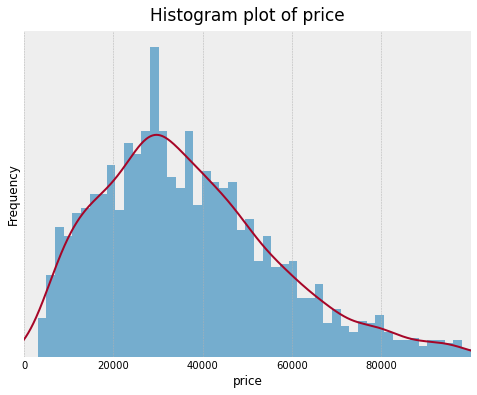

In [77]:
histogram_plot(df , 'price', 99999, 50)

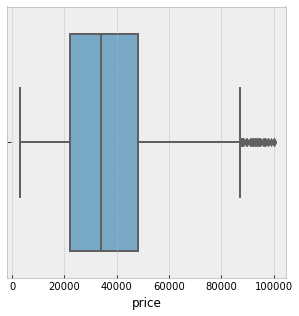

In [9]:
box_plot(df, 'price')

From the histogram and boxplot we can see that most cars have price between $20,000 to $50,000. 

In [10]:
display(df[df['price']>150000])

,brand,mileage,car-type,age,transmission,color,drivetrain,fuel type,engine-hp,engine-l,engine-type,location,no_of_features,major options,price


It can be seen that usually high brand cars are over $150,000 in price, hence not outlier.

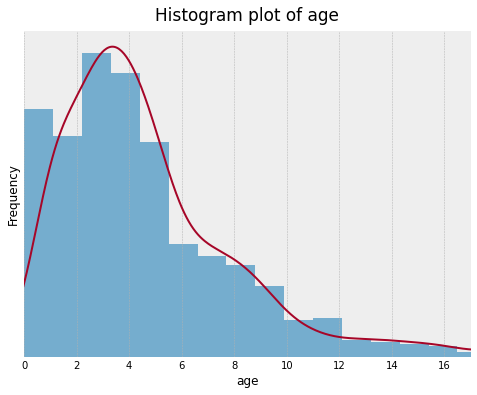

In [11]:
histogram_plot(df , 'age', 17, 20)

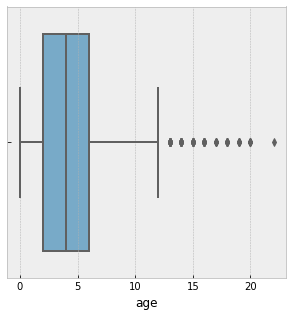

In [12]:
box_plot(df, 'age')

Most of the cars are being used for 2 to 6 years. Distribution is right skewed due to some cars being sold after 12 -13 years. Lets see how many are there older than 13 years.

In [13]:
len(df[df['age']>15])

37

In [14]:
df[df['age']>15][:15]

,brand,mileage,car-type,age,transmission,color,drivetrain,fuel type,engine-hp,engine-l,engine-type,location,no_of_features,major options,price
2,Toyota,216288,Toyota Tacoma Prerunner V6 Crew Cab SB,19,Automatic,Red,Rear-Wheel Drive,Gasoline,190.000000,3.4,V6,Burnaby,1.0,Alloy Wheels,11980
28,Toyota,201000,Toyota Sienna CE,20,Automatic,Other,Front-Wheel Drive,Gasoline,210.000000,3.0,V6,New Westminster,-1.0,NaN,3990
91,Toyota,189500,Toyota Highlander Base,19,Automatic,Black,Front-Wheel Drive,Gasoline,155.000000,2.4,I4,Abbotsford,-1.0,NaN,5900
123,Toyota,247000,Toyota RAV4 Base 4WD,19,Automatic,Gray,All-Wheel Drive,Gasoline,148.000000,2.0,I4,New Westminster,-1.0,NaN,4490
266,Ford,220000,Ford Freestyle SE,16,Automatic,Black,Front-Wheel Drive,Gasoline,203.000000,3.0,V6,Surrey,1.0,Alloy Wheels,3500
359,Nissan,231000,Nissan Murano SE AWD,16,Manual,Silver,All-Wheel Drive,Gasoline,245.000000,3.5,V6,Langley City,2.0,"Sunroof/Moonroof, Alloy Wheels",4450
392,Acura,160985,Acura MDX AWD with Touring Package,18,Automatic,Black,All-Wheel Drive,Gasoline,265.000000,3.5,V6,Langley,-1.0,NaN,5900
405,Pontiac,178733,Pontiac Vibe Base,17,Manual,Gray,Front-Wheel Drive,Gasoline,130.000000,1.8,I4,Squamish,-1.0,NaN,3900
503,Mazda,237975,Mazda MAZDA3,18,Automatic,Gray,All-Wheel Drive,Gasoline,148.000000,2.0,I4,Port Coquitlam,2.0,"Bluetooth, Alloy Wheels",3900
523,Honda,249000,Honda Pilot EX-L AWD,18,Automatic,Blue,Four-Wheel Drive,Gasoline,240.000000,3.5,V6,Surrey,5.0,"Leather Seats, Heated Seats, DVD Entertainment...",5980


In [15]:
np.mean(df[df['age']>15]['price'])

8610.972972972973

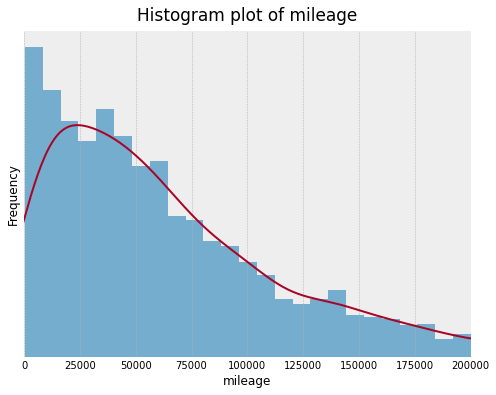

In [16]:
histogram_plot(df , 'mileage', 200000, 50)

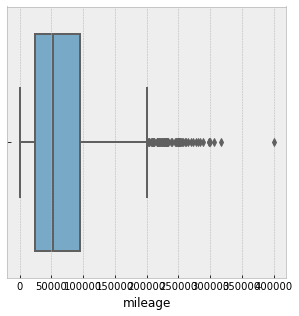

In [17]:
box_plot(df, 'mileage')

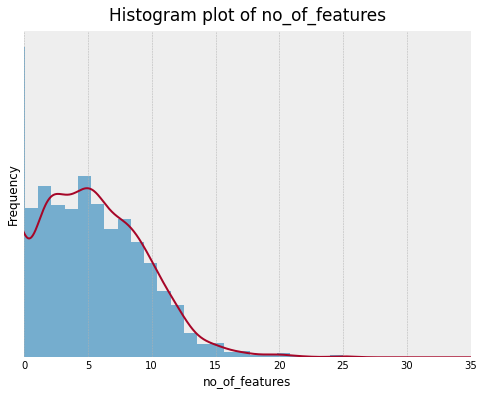

In [18]:
histogram_plot(df , 'no_of_features', 35, 25)

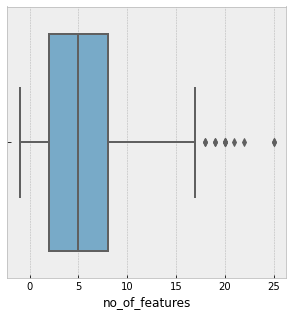

In [19]:
box_plot(df, 'no_of_features')

Most of the cars have up to 13 features. There are some cars with features more than 17. Lets take a look at those data below.

In [20]:
len(df[df['no_of_features']>17])

12

In [21]:
df[df['no_of_features']>17]

,brand,mileage,car-type,age,transmission,color,drivetrain,fuel type,engine-hp,engine-l,engine-type,location,no_of_features,major options,price
121,BMW,7156,BMW X5 xDrive40i AWD,1,Automatic,Black,All-Wheel Drive,Gasoline,335.000000,3.000000,I6,North Vancouver,19.0,"Leather Seats, Sunroof/Moonroof, Navigation Sy...",76900
332,RAM,124211,RAM 1500 Laramie Crew Cab 4WD,5,Automatic,Blue,Four-Wheel Drive,Gasoline,395.000000,5.700000,V8,Langley,20.0,"Leather Seats, Sunroof/Moonroof, Power Package...",37488
664,Lexus,27523,Lexus RX 350 F Sport AWD,3,Automatic,Silver,All-Wheel Drive,Gasoline,295.000000,3.500000,V6,Richmond,25.0,"Leather Seats, Sunroof/Moonroof, Power Package...",51989
1238,RAM,17500,RAM 1500 Laramie Crew Cab 4WD,3,Automatic,Gray,Four-Wheel Drive,Gasoline,272.657778,3.202923,I4,Nanaimo,20.0,"Leather Seats, Sunroof/Moonroof, Customer Pref...",60022
1253,Chrysler,650,Chrysler Pacifica Limited 35th Anniversary FWD,2,Automatic,Other,Front-Wheel Drive,Gasoline,287.000000,3.600000,V6,Surrey,21.0,"Leather Seats, Sunroof/Moonroof, Customer Pref...",56999
1300,Jeep,118361,Jeep Grand Cherokee Limited 4WD,6,Automatic,Gray,Four-Wheel Drive,Gasoline,295.000000,3.600000,V6,Chilliwack,20.0,"Leather Seats, Sunroof/Moonroof, Customer Pref...",29654
1328,Ford,217821,Ford F-150 Lariat SuperCrew 4WD,9,Automatic,Other,Four-Wheel Drive,Gasoline,365.000000,3.500000,V6,Langley,18.0,"Leather Seats, Sunroof/Moonroof, Power Package...",25488
1384,Jeep,53881,Jeep Compass Trailhawk 4WD,4,Automatic,Gray,Four-Wheel Drive,Gasoline,180.000000,2.400000,I4,Langley,19.0,"Leather Seats, Customer Preferred Package, Pow...",32888
1483,Volkswagen,68000,Volkswagen Atlas SEL Premium 4Motion AWD,3,Automatic,Black,All-Wheel Drive,Gasoline,272.657778,3.600000,V6,Abbotsford,18.0,"Leather Seats, Sunroof/Moonroof, Power Package...",44995
1598,BMW,73502,BMW X5 xDrive35i AWD,4,Automatic,Gray,All-Wheel Drive,Gasoline,300.000000,3.000000,I6,North Vancouver,20.0,"Sport Package, Leather Seats, Driver Assistanc...",49900


The aim is to see if no. of features has any affect on the price of car. From the table above it is clear that price range vary from around 30,000 to 80,000. It is possible that these could be input mistake. If required I will impute them later.

### Categorical Variables

In [22]:
def categorical_eda(df, col, h, a):
    # Plot count distribution of categorical data
    sns.reset_orig()
    df1 = df[df[col] != str(-1)]
    fig = sns.catplot(x=df1[col], kind="count", data=df1, height = h, aspect = a, 
                      order = df1[col].value_counts().index)
    plt.xlabel('{}'.format(col), fontsize =12)
    plt.ylabel('Count', fontsize =12)
    fig.set_xticklabels(rotation=90, fontsize=12)
    plt.show()

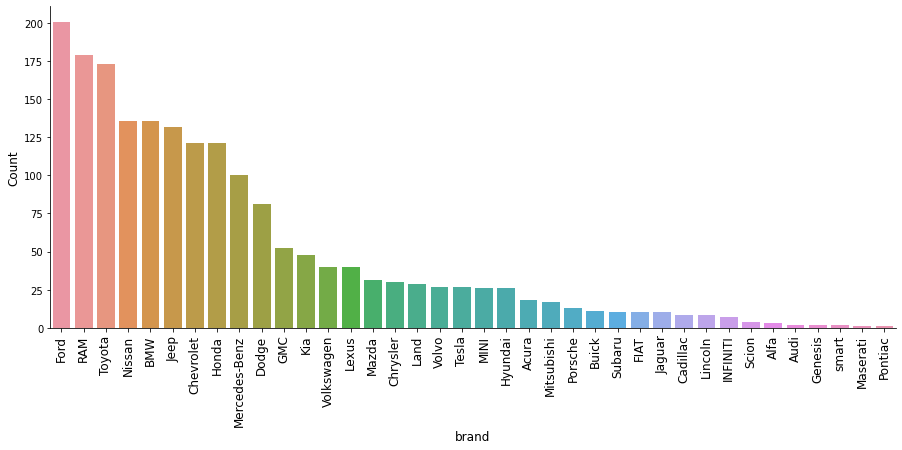

In [23]:
categorical_eda(df, 'brand', 5, 2.5)

Ford, RAM and Toyota cars are the most selling cars

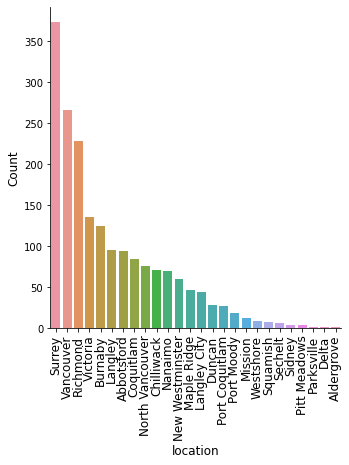

In [24]:
categorical_eda(df, 'location', 5, 1)

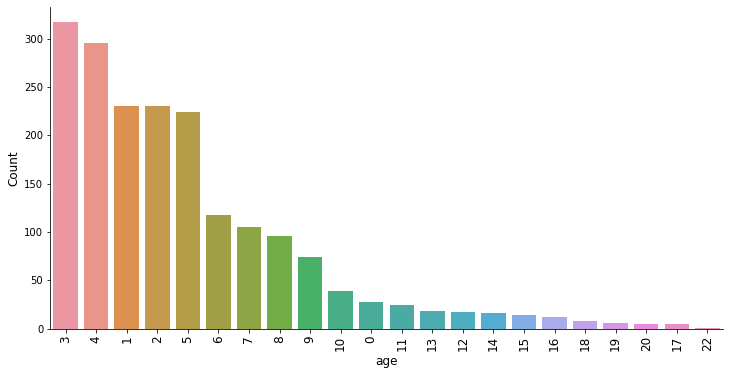

In [25]:
categorical_eda(df, 'age', 5, 2)

Data shows that people sell there cars after using it for 1 to 5 years. There are some cars which are older than 20 years as well.

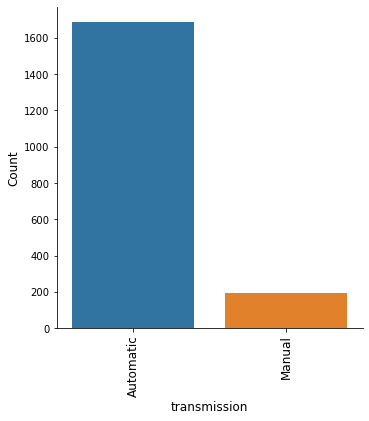

In [26]:
categorical_eda(df, 'transmission', 5, 1)

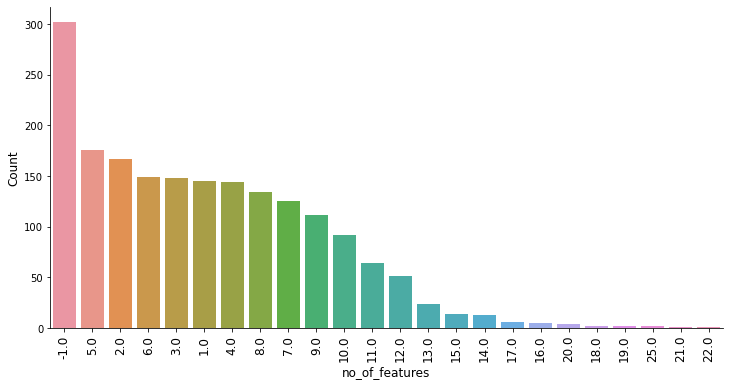

In [27]:
categorical_eda(df, 'no_of_features', 5, 2)

Most cars dont have any feature. Some cars have 1 to 10 features. Some have more than 20 which could be outliers.

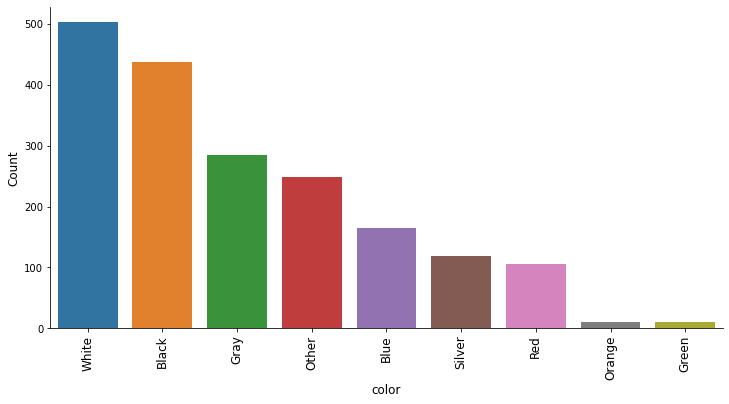

In [28]:
categorical_eda(df, 'color', 5, 2)

Most common color is white and black

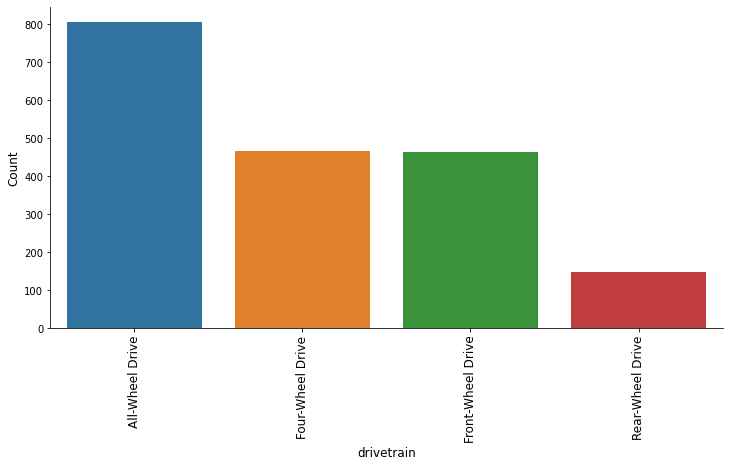

In [29]:
categorical_eda(df, 'drivetrain', 5, 2)

Most cars are All-Wheel Drive followed by Front-Wheel Drive and Four-Wheel Drive

In [30]:
df.columns

Index(['brand', 'mileage', 'car-type', 'age', 'transmission', 'color',
       'drivetrain', 'fuel type', 'engine-hp', 'engine-l', 'engine-type',
       'location', 'no_of_features', 'major options', 'price'],
      dtype='object')

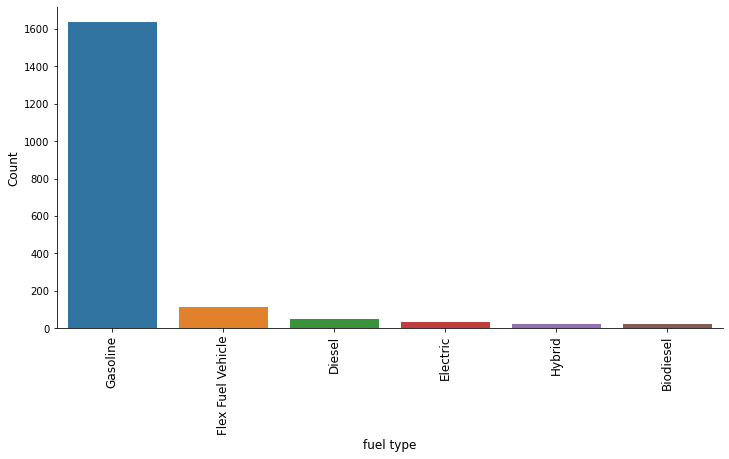

In [31]:
categorical_eda(df, 'fuel type', 5, 2)

Most cars are Gasoline

### Bivariate Analysis

In [32]:
def scatter_plot(df, x_input):    
    sns.set_style('darkgrid')
    fig, ax = plt.subplots(figsize = (10,6))
    sns.regplot(x=df[x_input], y=df['price'], fit_reg=True, 
                line_kws={"color": "black"})
    plt.title('Scatter plot of Price($) of car vs {}'.format(x_input), fontsize=13)
    plt.xlabel('{}'.format(x_input), fontsize =12)
    plt.ylabel('Price($)', fontsize =12)
    plt.show()

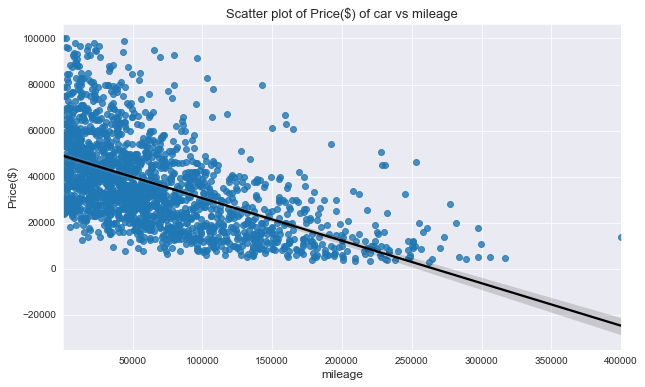

In [33]:
scatter_plot(df, 'mileage')

In [34]:
df.columns

Index(['brand', 'mileage', 'car-type', 'age', 'transmission', 'color',
       'drivetrain', 'fuel type', 'engine-hp', 'engine-l', 'engine-type',
       'location', 'no_of_features', 'major options', 'price'],
      dtype='object')

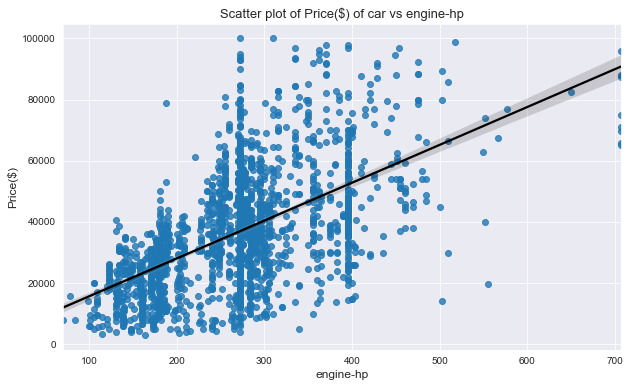

In [35]:
scatter_plot(df, 'engine-hp')

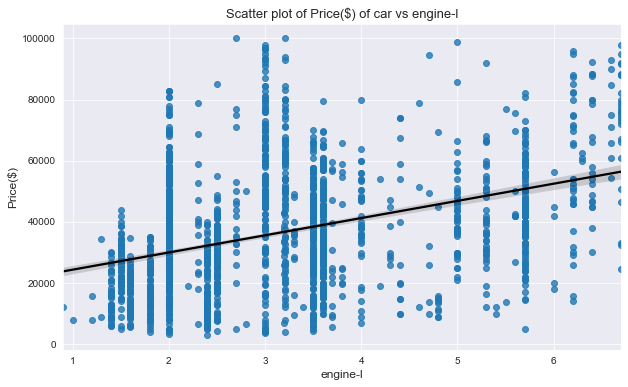

In [36]:
scatter_plot(df, 'engine-l')

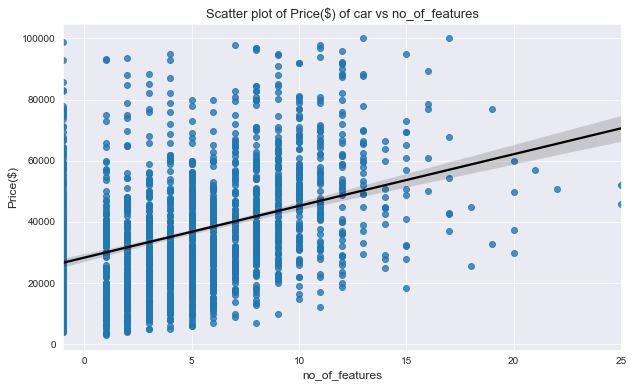

In [37]:
scatter_plot(df, 'no_of_features')

In [60]:
df.columns

Index(['brand', 'mileage', 'car-type', 'age', 'transmission', 'color',
       'drivetrain', 'fuel type', 'engine-hp', 'engine-l', 'engine-type',
       'location', 'no_of_features', 'major options', 'price'],
      dtype='object')

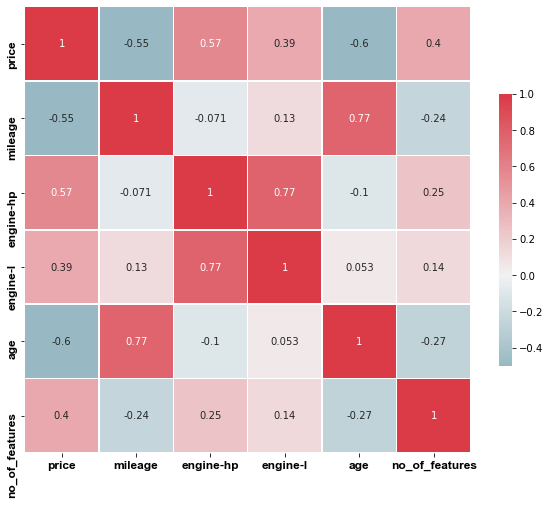

In [71]:
#ref: https://github.com/PlayingNumbers/ds_salary_proj/blob/master/data_eda.ipynb
plt.figure(figsize=(10, 10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
font = {'fontname':'Arial'}
plt.xticks(fontsize = 12, **font, fontweight='bold')
plt.yticks(fontsize = 12, **font, fontweight='bold')

sns.heatmap(df[['price', 'mileage', 'engine-hp', 'engine-l','age', 'car-type','transmission','color',
               'no_of_features']].corr(),vmax=1, vmin =-0.5,center=0, 
            cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True) ;

### Continuous - variable relationship

In [39]:
def swarm_plot(df, x_input, rot=0):    
    sns.reset_orig() #reset the figure parameters
    fig, ax = plt.subplots(figsize = (10,6))
    fig = sns.swarmplot(x=x_input, y="price", data=df)
    plt.title('Swarm plot of Price($) of car vs {}'.format(x_input), fontsize=13)
    plt.xlabel('{}'.format(x_input), fontsize =12)
    plt.ylabel('price', fontsize =12)
    plt.xticks(rotation=rot, fontsize=12)
    plt.show()

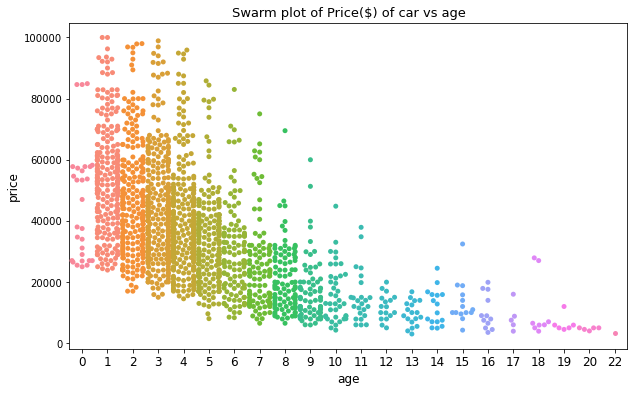

In [40]:
swarm_plot(df, 'age')

Price of car slightly decreases with increase in age of the car.

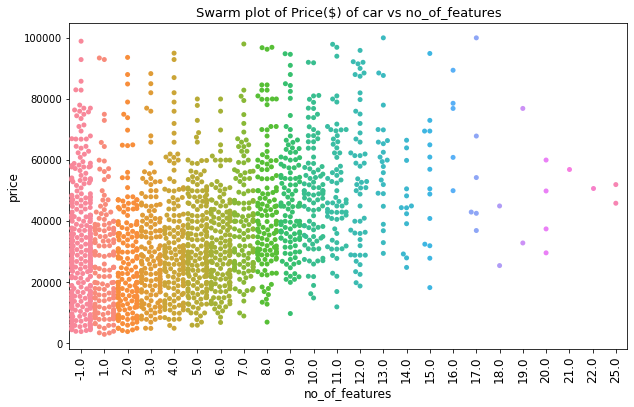

In [41]:
swarm_plot(df, 'no_of_features', 90)

No. of features show a slightly positive dependence on the Price of the car. We can cluster the number of features if required for model optimization later.

In [42]:
df['no_of_features'].value_counts()[:15]

-1.0     302
 5.0     176
 2.0     167
 6.0     149
 3.0     148
 1.0     145
 4.0     144
 8.0     134
 7.0     125
 9.0     112
 10.0     92
 11.0     64
 12.0     51
 13.0     24
 15.0     14
Name: no_of_features, dtype: int64

In [43]:
df['no_of_features'] = df['no_of_features'].apply(lambda x: 3 if x == -1 else x)

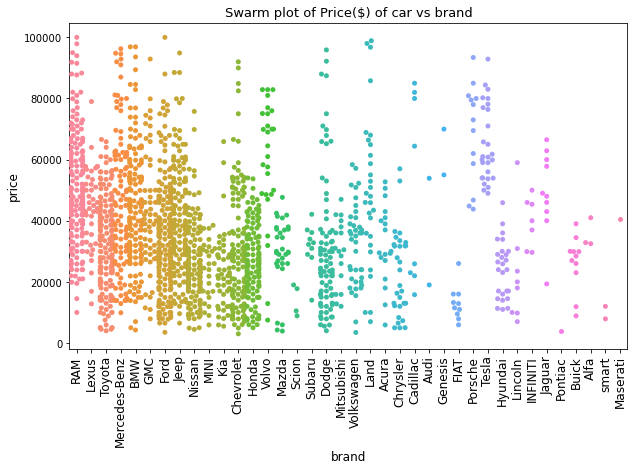

In [44]:
swarm_plot(df, 'brand', 90)

Model of the car does not show any such trend with the price. However, Audi, Porsche, Ferrari and Rolls-Royce are some of the most expensive cars in the market.

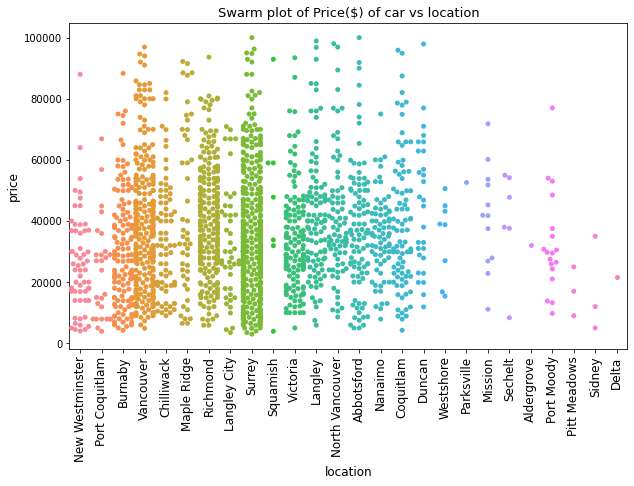

In [45]:
swarm_plot(df, 'location', 90)

Most expensive cars tend to be sold in Vancouver Mainland, hence there looks to be some corelation between price of car and location

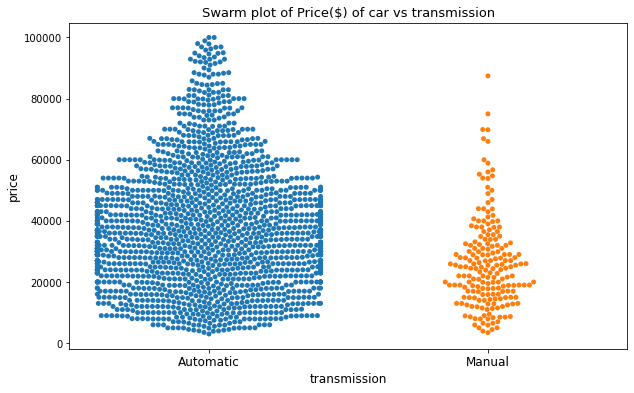

In [46]:
swarm_plot(df, 'transmission')

No major observation

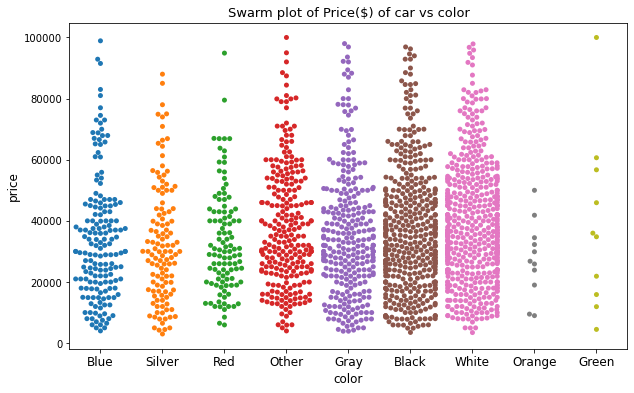

In [47]:
swarm_plot(df, 'color')

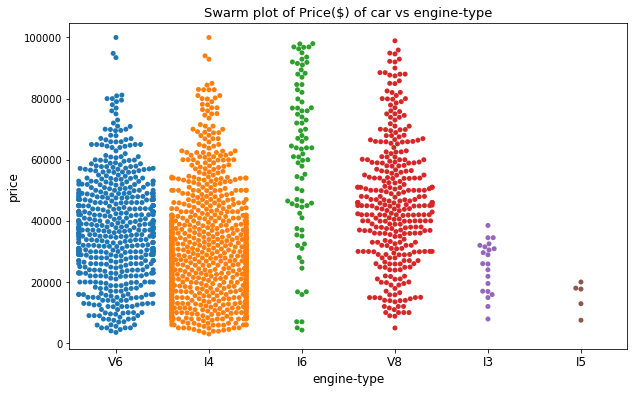

In [48]:
swarm_plot(df, 'engine-type')

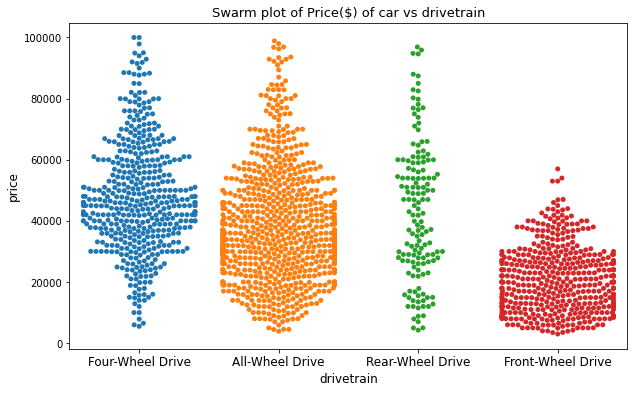

In [49]:
swarm_plot(df, 'drivetrain')

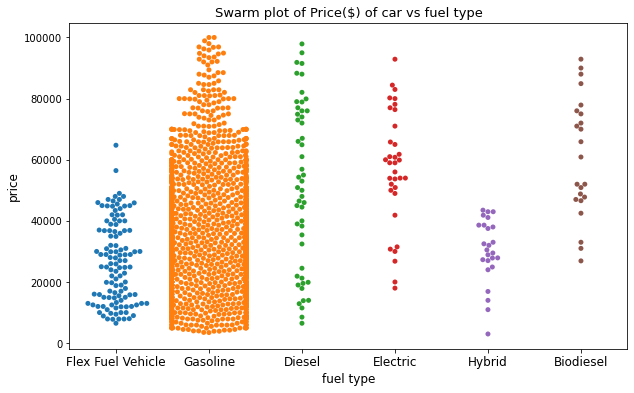

In [50]:
swarm_plot(df, 'fuel type')

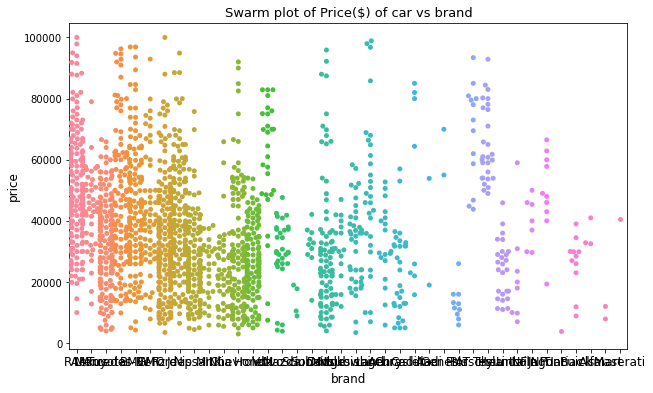

In [51]:
swarm_plot(df, 'brand')

### Pivot tables

In [52]:
np.round(pd.pivot_table(df, values='price', index=['brand'],
               aggfunc='mean')).sort_values('price', ascending=False)

,price
brand,
Porsche,68872.0
Tesla,64769.0
Genesis,62488.0
Volvo,59618.0
RAM,50153.0
Land,49912.0
Cadillac,49759.0
Jaguar,49251.0
Mercedes-Benz,46367.0


This gives us an idea of which model of car to target during shopping according to price range.

In [53]:
np.round(pd.pivot_table(df, values='price', index=['brand'],
               aggfunc='count')).sort_values('price', ascending=False)

,price
brand,
Ford,201
RAM,179
Toyota,173
BMW,136
Nissan,136
Jeep,132
Chevrolet,121
Honda,121
Mercedes-Benz,100


Ford, RAM, Toyota, Nissan and Mercedes are the most common cars available in the market.

In [54]:
np.round(pd.pivot_table(df, values='price', index=['engine-type'],
               aggfunc='mean')).sort_values('price', ascending=False)

,price
engine-type,
I6,61179.0
V8,46414.0
V6,37703.0
I4,30612.0
I3,25008.0
I5,15213.0


Cars with powerful engine are more expensive.



In [55]:
np.round(pd.pivot_table(df, values='price', index=['transmission'],
               aggfunc='mean')).sort_values('price', ascending=False)

,price
transmission,
Automatic,37861.0
Manual,26205.0


Automatic Cars are way more expensive than Manual Cars

In [56]:
np.round(pd.pivot_table(df, values='price', index=['fuel type', 'drivetrain', 'transmission'],
               aggfunc='mean'))

price
fuel type         drivetrain        transmission         
Biodiesel         All-Wheel Drive   Automatic     65888.0
                  Four-Wheel Drive  Automatic     60773.0
Diesel            All-Wheel Drive   Automatic     35824.0
                  Four-Wheel Drive  Automatic     64810.0
                  Front-Wheel Drive Automatic     27998.0
Electric          All-Wheel Drive   Automatic     74474.0
                  Front-Wheel Drive Automatic     28411.0
                  Rear-Wheel Drive  Automatic     61276.0
                                    Manual        49995.0
Flex Fuel Vehicle All-Wheel Drive   Automatic     25101.0
                  Four-Wheel Drive  Automatic     34252.0
                  Front-Wheel Drive Automatic     20375.0
                                    Manual        10492.0
                  Rear-Wheel Drive  Automatic     29413.0
Gasoline          All-Wheel Drive   Automatic     38918.0
                                    Manual        29448.0
                  Four-Wheel Drive  Automatic     47564.0
                                    Manual        36554.0
                  Front-Wheel Drive Automatic     21153.0
                                    Manual        18714.0
                  Rear-Wheel Drive  Automatic     39979.0
                                    Manual        44954.0
Hybrid            All-Wheel Drive   Automatic     33298.0
                                    Manual        42990.0
                  Front-Wheel Drive Automatic     25744.0
                                    Manual        31021.0

Data shows that Biodiseal cars are the most expensive

In [57]:
pd.pivot_table(df, values='price', index=['fuel type', 'drivetrain', 'transmission'],
               aggfunc='count')

price
fuel type         drivetrain        transmission       
Biodiesel         All-Wheel Drive   Automatic         1
                  Four-Wheel Drive  Automatic        22
Diesel            All-Wheel Drive   Automatic        17
                  Four-Wheel Drive  Automatic        29
                  Front-Wheel Drive Automatic         4
Electric          All-Wheel Drive   Automatic         8
                  Front-Wheel Drive Automatic         7
                  Rear-Wheel Drive  Automatic        18
                                    Manual            1
Flex Fuel Vehicle All-Wheel Drive   Automatic        29
                  Four-Wheel Drive  Automatic        40
                  Front-Wheel Drive Automatic        40
                                    Manual            2
                  Rear-Wheel Drive  Automatic         3
Gasoline          All-Wheel Drive   Automatic       693
                                    Manual           48
                  Four-Wheel Drive  Automatic       360
                                    Manual           15
                  Front-Wheel Drive Automatic       295
                                    Manual          101
                  Rear-Wheel Drive  Automatic       103
                                    Manual           22
Hybrid            All-Wheel Drive   Automatic         9
                                    Manual            1
                  Front-Wheel Drive Automatic        10
                                    Manual            5

Gasoline is the most common type of fuel in the cars. Along with the fuel type, Automatic and Front wheel drive transmission is also very common.

In [58]:
np.round(pd.pivot_table(df[df['fuel type']=='Gasoline'], values='price', index=['drivetrain', 'transmission'],
               columns ='color', aggfunc='mean'))

color                             Black     Blue     Gray    Green   Orange  \
drivetrain        transmission                                                
All-Wheel Drive   Automatic     38835.0  36796.0  41405.0  17467.0      NaN   
                  Manual        24508.0  29826.0  33676.0      NaN  25622.0   
Four-Wheel Drive  Automatic     47152.0  47452.0  42905.0  51452.0  34486.0   
                  Manual        33144.0  19952.0  45199.0      NaN  25888.0   
Front-Wheel Drive Automatic     21130.0  19353.0  20461.0      NaN  16439.0   
                  Manual        18336.0  19857.0  18466.0      NaN   9490.0   
Rear-Wheel Drive  Automatic     41472.0  48310.0  38391.0  21888.0  35864.0   
                  Manual        51904.0  46985.0      NaN  56699.0      NaN   

color                             Other      Red   Silver    White  
drivetrain        transmission                                      
All-Wheel Drive   Automatic     35209.0  32790.0  36794.0  41650.0  
                  Manual        29844.0  37995.0   4450.0  30664.0  
Four-Wheel Drive  Automatic     49433.0  50422.0  44352.0  48633.0  
                  Manual        22798.0      NaN  66900.0  33120.0  
Front-Wheel Drive Automatic     20213.0  21576.0  19357.0  23586.0  
                  Manual        20061.0  17388.0  16644.0  19337.0  
Rear-Wheel Drive  Automatic     37404.0  35468.0  37054.0  41600.0  
                  Manual        52137.0      NaN  12800.0  37550.0

Manual cars with Rear wheel drive are one of the expensive cars.

In [59]:
df.to_csv('modelling_major_option.csv', index= False)